<a href="https://colab.research.google.com/github/zhengwu123/Machine_learning_group_project/blob/master/final_project_multiclass_category_augmentattion_0.63.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import glob
import cv2
from PIL import Image
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import numpy as np


Using TensorFlow backend.


In [0]:
#clear data
!rm -rf real_main
!rm -rf real_nei
!rm -rf real_side
!rm -rf real_tongue
!rm -rf real_console
!rm -rf real_lid
!rm -rf real_di

!rm -rf fake_main
!rm -rf fake_nei
!rm -rf fake_side
!rm -rf fake_tougue
!rm -rf fake_console
!rm -rf fake_lid
!rm -rf fake_di

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!unzip "/content/drive/My Drive/sorted.zip" -d "/content"


Archive:  /content/drive/My Drive/sorted.zip
   creating: /content/real_tongue/
  inflating: /content/real_tongue/RackMultipart20200503-26620-1akr951.jpg  
replace /content/__MACOSX/real_tongue/._RackMultipart20200503-26620-1akr951.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/__MACOSX/real_tongue/._RackMultipart20200503-26620-1akr951.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/__MACOSX/real_tongue/._RackMultipart20200503-26620-1akr951.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/__MACOSX/real_tongue/._RackMultipart20200503-26620-1akr951.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/__MACOSX/real_tongue/._RackMultipart20200503-26620-1akr951.jpg  
  inflating: /content/real_tongue/RackMultipart20200416-10895-9smho0.jpg  
replace /content/__MACOSX/real_tongue/._RackMultipart20200416-10895-9smho0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]

In [0]:
#rename all my files
import glob, os

def rename(dir, pattern, titlePattern):
    for pathAndFilename in glob.iglob(os.path.join(dir, pattern)):
        title, ext = os.path.splitext(os.path.basename(pathAndFilename))
        os.rename(pathAndFilename, 
                  os.path.join(dir, titlePattern % title + ext))
#rename all files
rename('real_main', '*.JPG', '%s'+ " main")
rename('real_main', '*.jpg', '%s'+ " main")
rename('real_di', '*.jpg', '%s'+ " di")
rename('real_di', '*.JPG', '%s'+ " di")
rename('real_lid', '*.jpg', '%s'+ " lid")
rename('real_lid', '*.JPG', '%s'+ " lid")
rename('real_side', '*.jpg', '%s'+ " side")
rename('real_side', '*.JPG', '%s'+ " side")
rename('real_console', '*.jpg', '%s'+ " console")
rename('real_console', '*.JPG', '%s'+ " console")
rename('real_nei', '*.jpg', '%s'+ " nei")
rename('real_nei', '*.JPG', '%s'+ " nei")
rename('real_tongue', '*.jpg', '%s'+ " tongue")
rename('real_tongue', '*.JPG', '%s'+ " tongue")

rename('fake_main', '*.JPG', '%s'+ " main")
rename('fake_main', '*.jpg', '%s'+ " main")
rename('fake_di', '*.jpg', '%s'+ " di")
rename('fake_di', '*.JPG', '%s'+ " di")
rename('fake_lid', '*.JPG', '%s'+ " lid")
rename('fake_lid', '*.jpg', '%s'+ " lid")
rename('fake_side', '*.jpg', '%s'+ " side")
rename('fake_side', '*.JPG', '%s'+ " side")
rename('fake_console', '*.JPG', '%s'+ " console")
rename('fake_console', '*.jpg', '%s'+ " console")
rename('fake_nei', '*.jpg', '%s'+ " nei")
rename('fake_nei', '*.JPG', '%s'+ " nei")
rename('fake_tougue', '*.jpg', '%s'+ " tongue")
rename('fake_tougue', '*.JPG', '%s'+ " tongue")

In [0]:
# prepare data
import random
train_real_main = ['real_main/{}'.format(i) for i in os.listdir("real_main") if 'main' in i]
train_real_di = ['real_di/{}'.format(i) for i in os.listdir("real_di") if 'di' in i]
train_real_lid = ['real_lid/{}'.format(i) for i in os.listdir("real_lid") if 'lid' in i]
train_real_side = ['real_side/{}'.format(i) for i in os.listdir("real_side") if 'side' in i]
train_real_nei = ['real_nei/{}'.format(i) for i in os.listdir("real_nei") if 'nei' in i]
train_real_console = ['real_console/{}'.format(i) for i in os.listdir("real_console") if 'console' in i]
train_real_tongue = ['real_tongue/{}'.format(i) for i in os.listdir("real_tongue") if 'tongue' in i]
#fake
train_fake_main = ['fake_main/{}'.format(i) for i in os.listdir("fake_main") if 'main' in i]
train_fake_di = ['fake_di/{}'.format(i) for i in os.listdir("fake_di") if 'di' in i]
train_fake_lid = ['fake_lid/{}'.format(i) for i in os.listdir("fake_lid") if 'lid' in i]
train_fake_side = ['fake_side/{}'.format(i) for i in os.listdir("fake_side") if 'side' in i]
train_fake_nei = ['fake_nei/{}'.format(i) for i in os.listdir("fake_nei") if 'nei' in i]
train_fake_console = ['fake_console/{}'.format(i) for i in os.listdir("fake_console") if 'console' in i]
train_fake_tongue = ['fake_tougue/{}'.format(i) for i in os.listdir("fake_tougue") if 'tongue' in i]
train_images = train_real_main + train_real_di + train_real_lid + train_real_side + train_real_nei+train_real_console+train_real_tongue\
+ train_fake_main + train_fake_di + train_fake_lid + train_fake_side + train_fake_nei+train_fake_console+train_fake_tongue
random.shuffle(train_images)

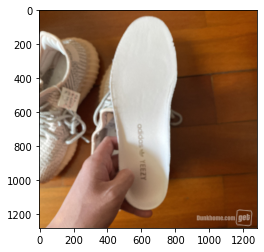

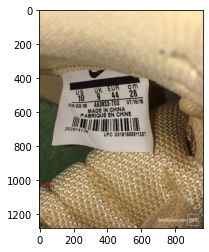

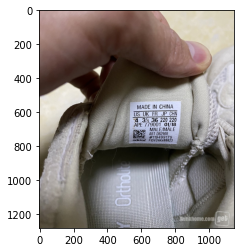

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for ima in train_images[0:3]:
  img=mpimg.imread(ima)
  imgplot = plt.imshow(img)
  plt.show()

In [0]:
nrows = 150
ncolumns = 150
channels = 3  #change to 1 if you want to use grayscale image


#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'main' in image:
            y.append(0)
        elif 'di' in image:
            y.append(1)
        elif 'lid' in image:
            y.append(2)
        elif 'side' in image:
            y.append(3)
        elif 'nei' in image:
            y.append(4)
        elif 'console' in image:
            y.append(5)
        elif 'tongue' in image:
            y.append(6)
    
    return X, y

In [0]:
# put traing image into x , y
X, y = read_and_process_image(train_images)
X = np.array(X)
y = np.array(y)

In [33]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

Shape of train images is: (1925, 150, 150, 3)
Shape of labels is: (1925,)


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Conv3D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import optimizers
#add data augmentation
from keras.preprocessing.image import ImageDataGenerator
batch_size=64
# Define the image transformations here
gen = ImageDataGenerator(horizontal_flip = True,
                         vertical_flip = True,
                         width_shift_range = 0.2,
                         height_shift_range = 0.2,
                         zoom_range = 0.2,
                         rotation_range = 90)
gen_flow = gen.flow(x_train,y_train, batch_size=batch_size)

In [58]:
model = Sequential()

#add conv1
model.add(Conv2D(32,(3,3),activation='relu',strides=1,padding="VALID", input_shape=(150,150,3)))
#add pool1
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#add conv2
model.add(Conv2D(64, (3, 3),strides=(3,3),activation='relu',padding="VALID"))
#add pool2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#x_train = np.array(real_image_array)
#x_test = np.array(fake_images_array)
#y_train = np.array(fake_images_array)
#y_test = np.array(y_test)
#model.fit(x_train,y_train,batch_size=100,epochs=50)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
r = model.fit(gen_flow,steps_per_epoch=len(x_train) / batch_size, epochs=400)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Epoch 1/400
25/24 [===============================] - 7s 271ms/step - loss: 103.3536 - accuracy: 0.1968
Epoch 2/400
25/24 [===============================] - 7s 270ms/step - loss: 1.8465 - accuracy: 0.2545
Epoch 3/400
25/24 [===============================] - 7s 267ms/step - loss: 1.8327 - accuracy: 0.2792
Epoch 4/400
25/24 [===============================] - 7s 265ms/step - loss: 1.8443 - accuracy: 0.2675
Epoch 5/400
25/24 [===============================] - 7s 268ms/step - loss: 1.8094 - accuracy: 0.2805
Epoch 6/400
25/24 [===============================] - 7s 264ms/step - loss: 1.8045 - accuracy: 0.2721
Epoch 7/400
25/24 [===============================] - 7s 264ms/step - loss: 1.7846 - accuracy: 0.2831
Epoch 8/400
25/24 [===============================] - 7s 268ms/step - loss: 1.8038 - accuracy: 0.2773
Epoch 9/400
25/24 [===============================] - 7s 266ms/step - loss: 1.8000 - accuracy: 0.2773
Epoch 10/400
25/24 [===============================] - 7s 265ms/step - loss: 1.7

In [59]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               4719104   
_________________________________________________________________
dense_19 (Dense)             (None, 7)                

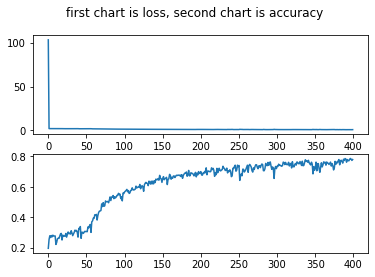

In [65]:
# plot loss per iteration
fig, axs = plt.subplots(2)
fig.suptitle('first chart is loss, second chart is accuracy')
axs[0].plot(r.history['loss'],label ='loss')
axs[1].plot(r.history['accuracy'],label ='accuracy')


In [60]:
#testing ..................
from sklearn import preprocessing
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
test_result = model.predict(x_test)
#b_test = preprocessing.label_binarize(test_result, classes=[0, 1, 2, 3,4,5,6])
#print("test_result",test_result.shape)
print("y_test",y_test)
test_result_array = []

for i in range(len(test_result)):
  mark = 0
  for j in range(7):
    if test_result[i][j] > 0.1:
      test_result_array.append(j)
      mark = 1
      break
    if mark == 0 and j == 6:
      test_result_array.append(10)

    
count = 0
print(len(test_result_array))
for i in range(len(y_test)):
  if test_result_array[i] == y_test[i]:
    count += 1
test_accuracy = count/(len(y_test))

print("test_result_array",test_result_array)
print("test accuracy:", test_accuracy)

accuracy_score= accuracy_score(y_test, test_result_array)
print('Average accuracy_score : {0:0.2f}'.format(
      accuracy_score))


y_test [4 5 5 2 4 5 0 4 6 4 0 3 3 5 2 4 0 1 1 6 0 0 6 5 3 6 0 5 5 4 4 5 5 3 5 5 4
 5 0 2 3 5 5 4 3 5 0 5 5 0 1 0 5 0 0 0 0 0 4 5 1 6 6 2 3 0 4 5 0 3 1 5 2 0
 0 2 3 6 6 5 5 6 4 6 0 3 3 5 5 5 3 3 4 4 3 4 2 5 5 0 1 4 6 3 0 2 4 4 6 6 0
 2 6 4 5 6 0 0 3 0 0 5 0 4 0 3 4 0 2 6 5 3 0 0 0 5 5 4 6 5 3 1 5 6 0 4 5 5
 4 1 6 3 0 6 6 5 5 0 0 6 0 4 3 0 5 5 0 5 0 5 2 5 5 4 2 1 1 0 0 5 0 0 4 6 6
 0 2 5 0 3 6 4 1 5 1 0 4 5 5 0 3 1 5 1 5 0 0 5 6 4 0 1 3 5 4 0 5 4 0 0 4 6
 2 0 0 3 0 5 6 0 0 6 0 5 2 5 6 1 5 0 4 2 3 4 6 5 5 3 4 1 4 4 1 5 0 4 3 0 2
 4 4 0 4 3 6 0 3 5 6 6 6 0 0 4 1 5 6 4 3 3 5 4 5 6 5 5 5 6 6 2 6 6 3 0 1 4
 4 5 1 4 4 5 4 1 4 6 0 2 0 5 0 4 3 6 6 6 5 5 1 0 0 3 0 4 4 0 1 0 0 5 6 6 5
 0 3 0 3 0 0 1 2 6 5 5 6 4 0 6 0 6 5 5 3 0 1 5 4 5 0 5 5 6 0 2 5 4 0 6 4 0
 3 5 6 0 1 6 6 0 5 4 5 5 2 1 3]
385
test_result_array [4, 5, 5, 2, 4, 2, 0, 0, 6, 6, 3, 3, 3, 5, 1, 3, 5, 0, 1, 0, 0, 0, 6, 0, 3, 6, 0, 5, 3, 4, 0, 1, 0, 3, 0, 5, 0, 5, 0, 3, 3, 5, 5, 4, 3, 5, 0, 0, 3, 0, 3, 3, 2, 0, 3, 3, 0, 0, 4, 5, 0, 3, 6,